# Exercises

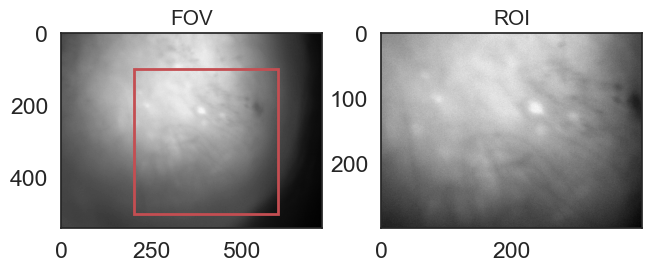

In [7]:
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import psutil
from pathlib import Path
import os

# CaImAn funtions and objects
import caiman as cm
from caiman.motion_correction import MotionCorrect, high_pass_filter_space
from caiman.source_extraction.cnmf import params as params
from caiman.source_extraction import cnmf
from caiman.source_extraction.cnmf.cnmf import load_CNMF

import sys
import os
sys.path.append(os.path.abspath("code"))
from utils import download_data
import auxiliary_functions as aux


import seaborn as sns
sns.set_theme(context='notebook',style='white',font_scale=1.5)

# download data for the lesson (this can take a few minutes)
#download_data('https://surfdrive.surf.nl/files/index.php/s/HeYXPdvMO87fbq7')

# set path to video of the full field of view
input_tif_file_path_FOV = 'data/calcium_video.tif'   
input_tif_file_path = 'data/caiman_video_trial_0.tif'  

FOV = cm.load(input_tif_file_path_FOV) # load video with complete field of view (FOV)


# play video (a new window will open)
FOV.play(gain = 1,  #light intensity of video
         magnification = 1, #size of display movie
         fr = 20) # frame rate at which the movie is played

#As can be seen from the original video, there are regions in the border that are not iluminated, so it make no sense to use them in the processing. 
#he file *caiman_video_trial_0.tif* correspong to a cropped region of interests. 

#FOV : = entire field of view of the microscope  
#ROI : = region of interest we will work with. It corresponds to the most iluminated area.

# Let's visualize the FOV and the ROI
aux.plot_FOV(FOV_file = input_tif_file_path_FOV , ROI_file = input_tif_file_path)

## Exercise 1: Image characteristics
---

**A.** Distiguishing pixels   

Fluctuations in the activitation of the neuron can be directly observed on the video or in a temporal trace plot of each pixel. Plotting the temporal trace will allow us to see the calcium transient dinamic, if a pixel belonging to a neuron is selected. 

* Select a set of *N* random pixels from the ROI and plot the temporal evolution of pixel value. If the random pixels are choosen from an active neuron, you will be able to see the calcium transcient dynamic. Try this a few time to appreciate the results.

**B.** Temporal statistics of pixel activation
 * For the selected pixels, plot the histogram of pixel value. What are the difference in different regions?, and how can that help to distinguish a pixel that belongs to a neuron from a background pixel?

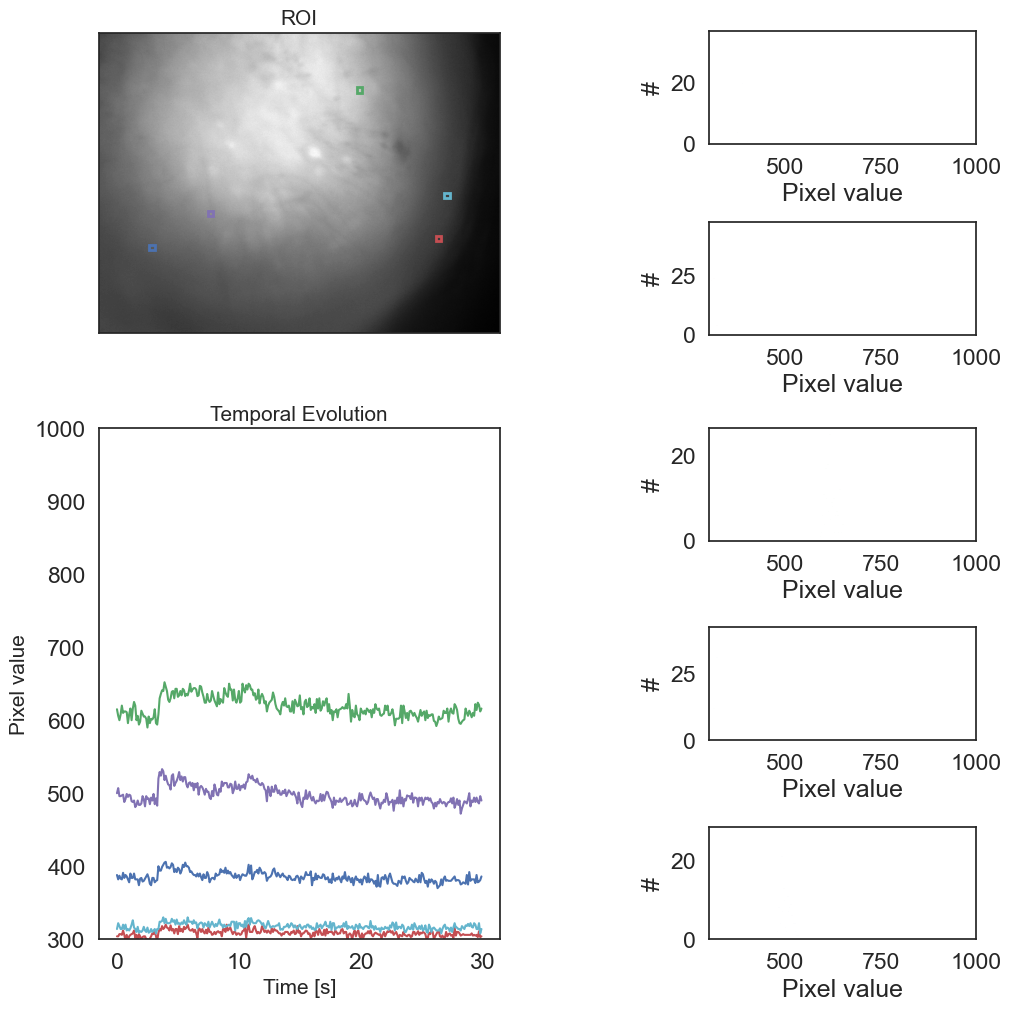

In [8]:
from auxiliary_functions import temporal_evolution as temporal_evolution

temporal_evolution(file_name=input_tif_file_path_FOV)
## this auxillary function plots the intensity of some random pixels over time

I can see that the output of the random pixel varies by it's location. When the location of the pixel is on a calcium transient signal, an increase in intensity can be observed. There is also background noise visible, a lot of light is eminating from the ROI, and not every area of the area contains neurons showing calcium transients. I suspect the background noise is due to extracellular or already present calcium interacting with the indicator, in combination with auto-fluoresence caused by laser excitation. What would help to distinguish the pixel value of a neuron is to figure out what the value of the surrounding area is, and use statistical methods to determine the background noise across the whole FOV. Some areas may have less background noise, and some neurons may lay deeper in the tissue, therefore it would be helpful to determine exactly where each neuron is, which in turn would require the video to be motion corrected, as the shifting of the tissue would cause artifacts across the signal.  


* If we can already see the calcium traces from individual pixels, why do we need to run source extraction to segment the neurons? Why, as a starter, would not be a good idea to work directly with the temporal traces of the pixels? 

It would not be a good idea to work with the direct temporal traces due to the motion that is present in the tissue. Also neuronal cell bodies may overlap, or lie at a different plane relative to the focal plane. The blood vessels present in the brain may obstruct part of the signal of some neurons and do this transiently as the organisms heart beats, or when it breathes. We also need to run source extraction to increase scalability and reproducability of the data.  

## Exercise 2: motion correction parameters
---

One parameter that impacts motion correction performance is the size of the spatial filter that is applyed to the video.

* Use the following function from CaImAn and plot the result of different space filtering applyed to a single frame of the video:from caiman.motion_correction import high_pass_filter_space

After many attempts, I can not plot the results of the different spacial filtering. 

* How will this filtering affect the measure of crispness?

Spatial filtering like high pass filtering removes low frequency components and background noise from the the fraames of the video. This helps enhancing the visibility of finer details and removing motion artifacts. Using this filter, the final video has enhanced crispness, finer level of detail and contrast. 

* Acording to Pnevmatikakis et al, which other factors are relevant for pw-rigid motion correction?

The other factors for PW rigid motion correction are the size of the template, the number of patches and the use of bidirectional registration 

- Explore the impact of different parameters in the output of motion correction algorithm by measuring crispness in the correlation image of the final outcome. Particularly measure the effect of different spatial filter size by applying motion correction algorithm multiple times and computing the crispness of the output video. 

- Display all crispness values for rigid and not rigid motion correction and plot them agains gSig_filters values.

- If possible, show the impact of the crispness value that comes from changing other relevant paraments.

*Note1: The is no need to save all the motion corrected movies, just save the cripsness values.*

*Note2: gSig_filters is an optional range of posible values, but if your computer gets to slow in the computation reduce the range.*


## Exercise 3: Source extraction parameters 
---

* For a fixed minimum correlation value (ie 0.6) select a range of possible PNR minimun values and study the impact of those in the final source extraction output.

* For a fixed value of PNR (ie 6) select a range of minimum correlation valur and study the impact of those in the final source extraction output.

* How do these paramenters affect the spatial sparcity of the output? Which set of parameter selection procedes the higher number of neurons? Is maximal number of neurons always better? Why?  

* Generate a plot of number of neurons vs PNR (or min corr value) to show how these parameters affect the source extracted signals.

* Are the temporal traces affected by these parameters?

* For different PNR and minimum correlation value plot the correlation image and the selected cells.